In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np, gc
import tensorflow as tf
import gc


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from IPython.display import display
from ipywidgets import FileUpload

from collections import Counter
from sklearn.pipeline import Pipeline



upload = FileUpload()
display(upload)


2025-08-26 17:53:35.429160: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 17:53:35.576667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756223615.638102 1838335 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756223615.657682 1838335 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756223615.779615 1838335 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

FileUpload(value=(), description='Upload')

In [2]:
'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle --version
'''

'\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle --version\n'

In [3]:
'''
!kaggle datasets files -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot
'''

'\n!kaggle datasets files -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot\n'

In [4]:
'''
!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot --unzip
'''

'\n!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot --unzip\n'

In [5]:
'''
!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot -f "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"

!unzip DNN-EdgeIIoT-dataset.csv.zip
'''

'\n!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot -f "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"\n\n!unzip DNN-EdgeIIoT-dataset.csv.zip\n'

In [6]:
df_edge = pd.read_csv("Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv")
df_edge.head()

/tmp/ipykernel_1838335/2719784295.py:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_edge = pd.read_csv("Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv")


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [7]:
df_edge.shape
for i, col in enumerate(df_edge.columns, start=1):
    print(f"{i}: {col}")



1: frame.time
2: ip.src_host
3: ip.dst_host
4: arp.dst.proto_ipv4
5: arp.opcode
6: arp.hw.size
7: arp.src.proto_ipv4
8: icmp.checksum
9: icmp.seq_le
10: icmp.transmit_timestamp
11: icmp.unused
12: http.file_data
13: http.content_length
14: http.request.uri.query
15: http.request.method
16: http.referer
17: http.request.full_uri
18: http.request.version
19: http.response
20: http.tls_port
21: tcp.ack
22: tcp.ack_raw
23: tcp.checksum
24: tcp.connection.fin
25: tcp.connection.rst
26: tcp.connection.syn
27: tcp.connection.synack
28: tcp.dstport
29: tcp.flags
30: tcp.flags.ack
31: tcp.len
32: tcp.options
33: tcp.payload
34: tcp.seq
35: tcp.srcport
36: udp.port
37: udp.stream
38: udp.time_delta
39: dns.qry.name
40: dns.qry.name.len
41: dns.qry.qu
42: dns.qry.type
43: dns.retransmission
44: dns.retransmit_request
45: dns.retransmit_request_in
46: mqtt.conack.flags
47: mqtt.conflag.cleansess
48: mqtt.conflags
49: mqtt.hdrflags
50: mqtt.len
51: mqtt.msg_decoded_as
52: mqtt.msg
53: mqtt.msgtype


In [8]:
# Drop non-numeric or non-useful columns
df_edge_clean = df_edge.drop(columns=[
    'frame.time', 'ip.src_host', 'ip.dst_host',
    'mqtt.protoname', 'mqtt.topic'
], errors='ignore')


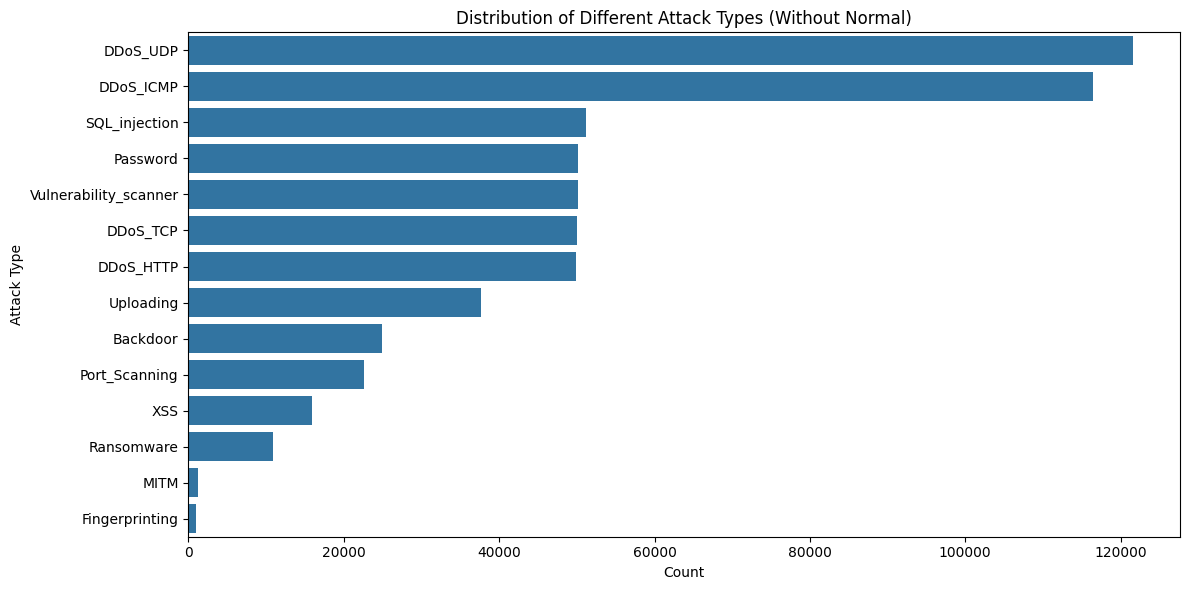

In [9]:
# Filter out Normal class
df_attacks_only = df_edge[df_edge['Attack_type'] != 'Normal']

# Count and plot different attack types
plt.figure(figsize=(12, 6))
sns.countplot(
    y='Attack_type',
    data=df_attacks_only,
    order=df_attacks_only['Attack_type'].value_counts().index
)
plt.title("Distribution of Different Attack Types (Without Normal)")
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.show()


## 1. Encode target labels

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_edge_clean['Attack_type'])


In [11]:

# Build X from numeric columns only; keep Attack_type for y
df_work = df_edge_clean.copy()

# y = multiclass labels
y_str = df_work['Attack_type'].astype(str).values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_str)
class_names = le.classes_
num_classes = len(class_names)

# X = numeric features only (exclude the target)
numeric_cols = df_work.drop(columns=['Attack_type']).select_dtypes(include=[np.number]).columns
X = df_work[numeric_cols].fillna(0.0)

print(f"Using {len(numeric_cols)} numeric features.")
# sanity check: no object dtype left
assert X.select_dtypes(exclude=[np.number]).shape[1] == 0


Using 43 numeric features.


In [12]:
for idx, name in enumerate(class_names):
    print(f"{idx} = {name}")


0 = Backdoor
1 = DDoS_HTTP
2 = DDoS_ICMP
3 = DDoS_TCP
4 = DDoS_UDP
5 = Fingerprinting
6 = MITM
7 = Normal
8 = Password
9 = Port_Scanning
10 = Ransomware
11 = SQL_injection
12 = Uploading
13 = Vulnerability_scanner
14 = XSS


## 2. Train-test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
X_train.shape
for i, col in enumerate(X_train.columns, start=1):
    print(f"{i}: {col}")


1: arp.opcode
2: arp.hw.size
3: icmp.checksum
4: icmp.seq_le
5: icmp.transmit_timestamp
6: icmp.unused
7: http.content_length
8: http.response
9: http.tls_port
10: tcp.ack
11: tcp.ack_raw
12: tcp.checksum
13: tcp.connection.fin
14: tcp.connection.rst
15: tcp.connection.syn
16: tcp.connection.synack
17: tcp.dstport
18: tcp.flags
19: tcp.flags.ack
20: tcp.len
21: tcp.seq
22: udp.port
23: udp.stream
24: udp.time_delta
25: dns.qry.name
26: dns.qry.qu
27: dns.qry.type
28: dns.retransmission
29: dns.retransmit_request
30: dns.retransmit_request_in
31: mqtt.conflag.cleansess
32: mqtt.conflags
33: mqtt.hdrflags
34: mqtt.len
35: mqtt.msg_decoded_as
36: mqtt.msgtype
37: mqtt.proto_len
38: mqtt.topic_len
39: mqtt.ver
40: mbtcp.len
41: mbtcp.trans_id
42: mbtcp.unit_id
43: Attack_label


## Train

#### Import & Define Reusable Evaluation Function

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, y_true, y_pred, labels=None):
    print(f"{name} — Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 (weighted)': f1_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 (macro)': f1_score(y_true, y_pred, average='macro', zero_division=0),
    }


### Train 6 Models  Baseline 

In [10]:
# ==== Multiclass baseline (BEFORE any balancing) ====
import numpy as np, pandas as pd, gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

# If these already exist above, this block will just reuse them.
def ensure_labels_and_split(df, X=None, y=None, class_names=None, test_size=0.2, seed=42):
    if X is None or y is None or class_names is None:
        # X: keep the numeric features you used earlier (already cleaned)
        # If you already have X, y, class_names defined, skip this.
        # Here I assume df_edge_clean exists and has Attack_type.
        X = df_edge_clean.drop(columns=['Attack_type'])
        y_str = df_edge_clean['Attack_type'].astype(str).values
        le = LabelEncoder()
        y = le.fit_transform(y_str)
        class_names = le.classes_
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state=seed
    )
    return X, y, class_names, X_train, X_test, y_train, y_test

# evaluate_model must already be defined in your notebook (you showed it earlier).
# If not, reuse your earlier evaluate_model with target_names=labels.

# Ensure labels/splits exist
X, y, class_names, X_train, X_test, y_train, y_test = ensure_labels_and_split(
    df_edge_clean, X if 'X' in globals() else None,
    y if 'y' in globals() else None,
    class_names if 'class_names' in globals() else None
)

# Float32 views to reduce RAM
X_train32 = np.asarray(X_train, dtype=np.float32)
X_test32  = np.asarray(X_test,  dtype=np.float32)
X_train32 = np.nan_to_num(X_train32, nan=0.0, posinf=0.0, neginf=0.0)
X_test32  = np.nan_to_num(X_test32,  nan=0.0, posinf=0.0, neginf=0.0)

num_classes = len(class_names)

# GPU check (for XGB and CNN)
# GPU flag + safe memory-growth (won’t crash if already initialized)
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
use_gpu = len(gpus) > 0
if use_gpu:
    try:
        for gpu in gpus:
            # only try to set if not already enabled
            if not tf.config.experimental.get_memory_growth(gpu):
                tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError:
        # Runtime already initialized; it's fine, continue
        pass

print("GPU available:", use_gpu, "| GPUs:", gpus)


results_mc_base = []   # <-- baseline results list


GPU available: False | GPUs: []


2025-08-24 21:50:50.467656: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-24 21:50:50.468385: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-24 21:50:50.468636: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: aftab-Legion-Slim-5-16AHP9
2025-08-24 21:50:50.468639: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: aftab-Legion-Slim-5-16AHP9
2025-08-24 21:50:50.469056: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.64.3
2025-08-24 21:50:50.469079: I external/local_xla/xla/stream_executor/cuda/cuda_dia

In [15]:
import joblib

In [18]:
'''
# 1) Random Forest (CPU)
rf_base = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_base.fit(X_train32, y_train)
y_rf_b = rf_base.predict(X_test32)
results_mc_base.append(evaluate_model("Random Forest (baseline)", y_test, y_rf_b, labels=class_names))
gc.collect()

#joblib.dump(rf_base, "rf_base.pkl")
'''

'\n# 1) Random Forest (CPU)\nrf_base = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)\nrf_base.fit(X_train32, y_train)\ny_rf_b = rf_base.predict(X_test32)\nresults_mc_base.append(evaluate_model("Random Forest (baseline)", y_test, y_rf_b, labels=class_names))\ngc.collect()\n\n#joblib.dump(rf_base, "rf_base.pkl")\n'

In [19]:
'''
# 2) XGBoost (GPU if available)
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    eval_metric='mlogloss',
    device='cuda' if use_gpu else 'cpu',
    n_jobs=-1,
    random_state=42
)
xgb_base.fit(X_train32, y_train)
y_xgb_b = xgb_base.predict(X_test32)
results_mc_base.append(evaluate_model("XGBoost (baseline" + (" GPU)" if use_gpu else " CPU)"),
                                      y_test, y_xgb_b, labels=class_names))
gc.collect()
'''


'\n# 2) XGBoost (GPU if available)\nxgb_base = XGBClassifier(\n    objective=\'multi:softprob\',\n    num_class=num_classes,\n    eval_metric=\'mlogloss\',\n    device=\'cuda\' if use_gpu else \'cpu\',\n    n_jobs=-1,\n    random_state=42\n)\nxgb_base.fit(X_train32, y_train)\ny_xgb_b = xgb_base.predict(X_test32)\nresults_mc_base.append(evaluate_model("XGBoost (baseline" + (" GPU)" if use_gpu else " CPU)"),\n                                      y_test, y_xgb_b, labels=class_names))\ngc.collect()\n'

In [20]:
'''
# 3) LightGBM (GPU if available; safe/stable params)
try:
    lgb_base = LGBMClassifier(
        objective='multiclass', num_class=num_classes,
        learning_rate=0.1, n_estimators=200,
        num_leaves=63, min_data_in_leaf=20,
        subsample=0.8, colsample_bytree=0.8,
        # stability
        force_col_wise=True, feature_pre_filter=False, max_bin=255,
        device='gpu' if use_gpu else 'cpu',
        random_state=42
    )
    lgb_base.fit(X_train32, y_train)
    tag_lgb = " (GPU)" if use_gpu else " (CPU)"
except Exception as e:
    print("LGBM GPU failed, fallback to CPU →", e)
    lgb_base = LGBMClassifier(
        objective='multiclass', num_class=num_classes,
        learning_rate=0.1, n_estimators=200,
        num_leaves=63, min_data_in_leaf=20,
        subsample=0.8, colsample_bytree=0.8,
        force_col_wise=True, feature_pre_filter=False, max_bin=255,
        device='cpu', random_state=42
    )
    lgb_base.fit(X_train32, y_train)
    tag_lgb = " (CPU fallback)"
y_lgb_b = lgb_base.predict(X_test32)
results_mc_base.append(evaluate_model("LightGBM (baseline)" + tag_lgb, y_test, y_lgb_b, labels=class_names))
gc.collect()

'''

'\n# 3) LightGBM (GPU if available; safe/stable params)\ntry:\n    lgb_base = LGBMClassifier(\n        objective=\'multiclass\', num_class=num_classes,\n        learning_rate=0.1, n_estimators=200,\n        num_leaves=63, min_data_in_leaf=20,\n        subsample=0.8, colsample_bytree=0.8,\n        # stability\n        force_col_wise=True, feature_pre_filter=False, max_bin=255,\n        device=\'gpu\' if use_gpu else \'cpu\',\n        random_state=42\n    )\n    lgb_base.fit(X_train32, y_train)\n    tag_lgb = " (GPU)" if use_gpu else " (CPU)"\nexcept Exception as e:\n    print("LGBM GPU failed, fallback to CPU →", e)\n    lgb_base = LGBMClassifier(\n        objective=\'multiclass\', num_class=num_classes,\n        learning_rate=0.1, n_estimators=200,\n        num_leaves=63, min_data_in_leaf=20,\n        subsample=0.8, colsample_bytree=0.8,\n        force_col_wise=True, feature_pre_filter=False, max_bin=255,\n        device=\'cpu\', random_state=42\n    )\n    lgb_base.fit(X_train32, y_tr

In [21]:
'''
# 4) MLP (CPU, scaled)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mlp_base = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPClassifier(hidden_layer_sizes=(128,),
                          max_iter=400, early_stopping=True, random_state=42))
])
mlp_base.fit(X_train32, y_train)
y_mlp_b = mlp_base.predict(X_test32)
results_mc_base.append(evaluate_model("MLP (baseline, scaled)", y_test, y_mlp_b, labels=class_names))
gc.collect()

'''

'\n# 4) MLP (CPU, scaled)\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nmlp_base = Pipeline([\n    ("scaler", StandardScaler(with_mean=False)),\n    ("mlp", MLPClassifier(hidden_layer_sizes=(128,),\n                          max_iter=400, early_stopping=True, random_state=42))\n])\nmlp_base.fit(X_train32, y_train)\ny_mlp_b = mlp_base.predict(X_test32)\nresults_mc_base.append(evaluate_model("MLP (baseline, scaled)", y_test, y_mlp_b, labels=class_names))\ngc.collect()\n\n'

In [22]:
'''
# 5) Decision Tree (CPU)
dt_base = DecisionTreeClassifier(max_depth=12, random_state=42)
dt_base.fit(X_train32, y_train)
y_dt_b = dt_base.predict(X_test32)
results_mc_base.append(evaluate_model("Decision Tree (baseline)", y_test, y_dt_b, labels=class_names))
gc.collect()
'''

'\n# 5) Decision Tree (CPU)\ndt_base = DecisionTreeClassifier(max_depth=12, random_state=42)\ndt_base.fit(X_train32, y_train)\ny_dt_b = dt_base.predict(X_test32)\nresults_mc_base.append(evaluate_model("Decision Tree (baseline)", y_test, y_dt_b, labels=class_names))\ngc.collect()\n'

In [23]:
'''
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

features_cnn = ['tcp.len','tcp.seq','tcp.ack','mbtcp.len']
missing = [c for c in features_cnn if c not in X_train.columns]
if missing:
    print("Skipping CNN — missing features:", missing)
else:
    scaler_cnn = MinMaxScaler()
    Xtr4 = scaler_cnn.fit_transform(X_train[features_cnn].astype('float32'))
    Xte4 = scaler_cnn.transform(X_test[features_cnn].astype('float32'))
    Xtr4_cnn = Xtr4.reshape(-1, 2, 2, 1)
    Xte4_cnn = Xte4.reshape(-1, 2, 2, 1)

    cnn_base = Sequential([
        Conv2D(16, (2,2), activation='relu', input_shape=(2,2,1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    cnn_base.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    dev = '/GPU:0' if use_gpu else '/CPU:0'
    es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)
    with tf.device(dev):
        cnn_base.fit(Xtr4_cnn, y_train, epochs=10, batch_size=512,
                     validation_split=0.2, callbacks=[es], verbose=1 if use_gpu else 0)
        probs_b = cnn_base.predict(Xte4_cnn, verbose=0)

    y_cnn_b = probs_b.argmax(axis=1)
    results_mc_base.append(
        evaluate_model("Lightweight CNN (baseline" + (" GPU)" if use_gpu else " CPU)"),
                       y_test, y_cnn_b, labels=class_names)
    )
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nfeatures_cnn = [\'tcp.len\',\'tcp.seq\',\'tcp.ack\',\'mbtcp.len\']\nmissing = [c for c in features_cnn if c not in X_train.columns]\nif missing:\n    print("Skipping CNN — missing features:", missing)\nelse:\n    scaler_cnn = MinMaxScaler()\n    Xtr4 = scaler_cnn.fit_transform(X_train[features_cnn].astype(\'float32\'))\n    Xte4 = scaler_cnn.transform(X_test[features_cnn].astype(\'float32\'))\n    Xtr4_cnn = Xtr4.reshape(-1, 2, 2, 1)\n    Xte4_cnn = Xte4.reshape(-1, 2, 2, 1)\n\n    cnn_base = Sequential([\n        Conv2D(16, (2,2), activation=\'relu\', input_shape=(2,2,1)),\n        Flatten(),\n        Dense(32, activation=\'relu\'),\n        Dropout(0.2),\n        Dense(num_classes, activation=\'softmax\')\n    ])\n    cnn_base.compile(optimizer=\'adam\', loss=\'sp

In [24]:
'''
df_base = pd.DataFrame(results_mc_base).drop_duplicates(subset=["Model"]).reset_index(drop=True)
df_base = df_base.sort_values("F1 (macro)", ascending=False)
num_cols = df_base.select_dtypes(include='number').columns
display(df_base.style.format({c: "{:.4f}" for c in num_cols}))
'''

'\ndf_base = pd.DataFrame(results_mc_base).drop_duplicates(subset=["Model"]).reset_index(drop=True)\ndf_base = df_base.sort_values("F1 (macro)", ascending=False)\nnum_cols = df_base.select_dtypes(include=\'number\').columns\ndisplay(df_base.style.format({c: "{:.4f}" for c in num_cols}))\n'

## Balancing and Training 42 feature

In [16]:
import joblib

In [ ]:

# 🔹 float32, clean NaN/Inf once
X_train32 = np.asarray(X_train, dtype=np.float32)
X_test32  = np.asarray(X_test,  dtype=np.float32)
X_train32 = np.nan_to_num(X_train32, nan=0.0, posinf=0.0, neginf=0.0)
X_test32  = np.nan_to_num(X_test32,  nan=0.0, posinf=0.0, neginf=0.0)


In [31]:

# class weights + per-sample weights
classes = np.unique(y_train)
cw_vals = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {c: w for c, w in zip(classes, cw_vals)}
sample_weight = np.array([class_weight_dict[c] for c in y_train])

results_tab = []
n_jobs = -1
use_gpu = True  # or your detected flag


In [ ]:
'''
# RF
rf_cw_42f = RandomForestClassifier(
    n_estimators=100,          # was 200 → start lighter
    max_depth=12,              # limit depth (huge memory saver)
    max_leaf_nodes=512,        # extra safety
    min_samples_leaf=5,        # prevents deep, spindly trees
    bootstrap=False,           # less memory than bootstrapped bags
    n_jobs=4,                  # avoid spawning 16 threads that fight for RAM
    random_state=42,
    class_weight=class_weight_dict
)

rf_cw_42f.fit(X_train32, y_train)
y_rf = rf_cw_42f.predict(X_test32)
results_tab.append(evaluate_model("Random Forest (class-weighted)", y_test, y_rf, labels=class_names))
gc.collect()

joblib.dump(rf_cw_42f, "rf_cw_42f.pkl")
'''

In [ ]:
'''
# XGB
xgb_cw_42f = XGBClassifier(
    objective='multi:softprob',
    num_class=len(class_names),
    eval_metric='mlogloss',
    device='cuda' if use_gpu else 'cpu',
    n_jobs=n_jobs,
    random_state=42
)
xgb_cw_42f.fit(X_train32, y_train, sample_weight=sample_weight)
y_xgb = xgb_cw_42f.predict(X_test32)
results_tab.append(evaluate_model("XGBoost (class-weighted" + (" GPU)" if use_gpu else " CPU)"),
                                  y_test, y_xgb, labels=class_names))
gc.collect()

joblib.dump(xgb_cw_42f, "xgb_cw_42f.pkl")
'''

In [ ]:
'''
# LGBM (class_weight; no sample_weight)
lgbm_cw_42f = LGBMClassifier(
    objective='multiclass', num_class=len(classes),
    force_col_wise=True, feature_pre_filter=False, max_bin=255,
    n_estimators=300, learning_rate=0.1, num_leaves=63,
    min_data_in_leaf=10, min_sum_hessian_in_leaf=1e-3,
    subsample=0.8, colsample_bytree=0.8,
    class_weight=class_weight_dict,
    device='gpu' if use_gpu else 'cpu',
    random_state=42
)
try:
    lgbm_cw_42f.fit(X_train32, y_train)
    tag = " (GPU)"
except Exception as e:
    print("GPU LGBM failed, falling back to CPU. Reason:", e)
    lgbm_cw_42f.set_params(device='cpu')
    lgbm_cw_42f.fit(X_train32, y_train)
    tag = " (CPU fallback)"
y_lgb = lgbm_cw_42f.predict(X_test32)
results_tab.append(evaluate_model("LightGBM" + tag + " (class-weighted)", y_test, y_lgb, labels=class_names))
gc.collect()

joblib.dump(lgbm_cw_42f, "lgbm_cw_42f.pkl")
'''

In [ ]:
'''
# Train MLP

# Start from float32 train for lower RAM
X0, y0 = X_train32, y_train
cnt0 = Counter(y0)
maj = max(cnt0, key=cnt0.get)

# 1) Under-sample majority to a cap (keeps things stable)
MAJ_CAP = 200_000
rus = RandomUnderSampler(random_state=42, sampling_strategy={maj: MAJ_CAP})
X_u, y_u = rus.fit_resample(X0, y0)
cnt_u = Counter(y_u)

# 2) Over-sample only classes BELOW the target
TARGET = 50_000
target_per_class = min(TARGET, cnt_u[maj])  # never exceed majority cap
sampling_strategy = {
    c: target_per_class
    for c, n in cnt_u.items()
    if n < target_per_class          # <-- only increase smaller classes
}
ros = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)
X_mlp_tr, y_mlp_tr = ros.fit_resample(X_u, y_u)

print("After RUS+ROS:", Counter(y_mlp_tr))
gc.collect()

# Train MLP on the rebalanced subset
mlp_cw_42f = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPClassifier(hidden_layer_sizes=(128,),
                          max_iter=400, early_stopping=True, random_state=42))
])
mlp_cw_42f.fit(X_mlp_tr, y_mlp_tr)
y_mlp = mlp_cw_42f.predict(X_test32)
results_tab.append(evaluate_model("MLP (scaled, RUS+ROS)", y_test, y_mlp, labels=class_names))

joblib.dump(mlp_cw_42f, "mlp_cw_42f.pkl")
'''

In [ ]:
'''
# Decision Tree
dt_cw_42f = DecisionTreeClassifier(max_depth=12, random_state=42, class_weight=class_weight_dict)
dt_cw_42f.fit(X_train32, y_train)
y_dt = dt_cw_42f.predict(X_test32)
results_tab.append(evaluate_model("Decision Tree (class-weighted)", y_test, y_dt, labels=class_names))
gc.collect()

joblib.dump(dt_cw_42f, "dt_cw_42f.pkl")
'''

### Avg Feature Normalized

In [ ]:
'''
rf_norm = rf_cw_42f.feature_importances_ / rf_cw_42f.feature_importances_.sum()
xgb_norm = xgb_cw_42f.feature_importances_ / xgb_cw_42f.feature_importances_.sum()
dt_norm = dt_cw_42f.feature_importances_ / dt_cw_42f.feature_importances_.sum()

features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_norm,
    'XGBoost': xgb_norm,
    'DicisionTree': dt_norm
})

# Top 20 based on mean importance
importance_df['avg'] = importance_df[['Random Forest', 'XGBoost', 'DicisionTree']].mean(axis=1)
top20 = importance_df.sort_values('avg', ascending=False).head(10)



importance_melted = top20.melt(id_vars='Feature', 
                                var_name='Model', 
                                value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_melted, 
            x='Importance', y='Feature', hue='Model')
plt.title("Top 20 Feature Importances Across Models")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()
'''

In [ ]:
'''
# 6) Lightweight CNN (GPU if available) on 4 features (2×2)
features_cnn = ['Attack_label', 'tcp.ack', 'udp.stream', 'icmp.seq_le']
missing = [c for c in features_cnn if c not in X_train.columns]
if missing:
    print("Skipping CNN — missing features:", missing)
else:
    scaler_cnn = MinMaxScaler()
    Xtr4 = scaler_cnn.fit_transform(X_train[features_cnn].astype('float32'))
    Xte4 = scaler_cnn.transform(X_test[features_cnn].astype('float32'))
    Xtr4_cnn = Xtr4.reshape(-1, 2, 2, 1)
    Xte4_cnn = Xte4.reshape(-1, 2, 2, 1)

    cnn = Sequential([
        Conv2D(16, (2,2), activation='relu', input_shape=(2,2,1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')  # multiclass
    ])
    cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)

    dev = '/GPU:0' if use_gpu else '/CPU:0'
    with tf.device(dev):
        cnn.fit(Xtr4_cnn, y_train, epochs=10, batch_size=512, validation_split=0.2, callbacks=[es], verbose=1 if use_gpu else 0)
        probs = cnn.predict(Xte4_cnn, verbose=0)
    y_cnn = probs.argmax(axis=1)
    results_tab.append(evaluate_model("Lightweight CNN"+(" (GPU)" if use_gpu else " (CPU)"), y_test, y_cnn, class_names))

    
joblib.dump(cnn, "cnn.pkl")
'''

##  <font color="red">Label Leakage Found !! </font>


In [ ]:
'''
# Summary
import pandas as pd
df_tab = pd.DataFrame(results_tab).sort_values("F1 (macro)", ascending=False)
display(df_tab.style.format({c: "{:.4f}" for c in df_tab.select_dtypes('number').columns}))
'''

##  <font color="ogange">Fixing Label Leakage and Retraining </font>

In [17]:
drop_cols = [
    "frame.time", "ip.src_host", "ip.dst_host", 
    "http.file_data", "http.request.uri.query", "http.request.method",
    "http.referer", "http.request.full_uri", "http.request.version",
    "dns.qry.name", "mqtt.protoname", "mqtt.topic"
]

df_edge_clean = df_edge.drop(columns=drop_cols, errors="ignore")


In [18]:
from sklearn.preprocessing import LabelEncoder
y_str = df_edge_clean["Attack_type"].astype(str).values
# Avoid shadowing old vars
le = LabelEncoder()
y_clean = le.fit_transform(df_edge_clean["Attack_type"].astype(str))
class_names = le.classes_

X_clean = (
    df_edge_clean
    .drop(columns=["Attack_type", "Attack_label"], errors="ignore")
    .select_dtypes(include=[np.number])
    .fillna(0.0)
)



In [19]:
print("X shape:", X_clean.shape)
print("y shape:", y_str.shape)
print("Number of classes:", num_classes)
print("Classes:", class_names)


X shape: (2219201, 41)
y shape: (2219201,)
Number of classes: 15
Classes: ['Backdoor' 'DDoS_HTTP' 'DDoS_ICMP' 'DDoS_TCP' 'DDoS_UDP' 'Fingerprinting'
 'MITM' 'Normal' 'Password' 'Port_Scanning' 'Ransomware' 'SQL_injection'
 'Uploading' 'Vulnerability_scanner' 'XSS']


In [20]:
for i, col in enumerate(X_clean.columns, start=1):
    print(f"{i}: {col}")

1: arp.opcode
2: arp.hw.size
3: icmp.checksum
4: icmp.seq_le
5: icmp.transmit_timestamp
6: icmp.unused
7: http.content_length
8: http.response
9: http.tls_port
10: tcp.ack
11: tcp.ack_raw
12: tcp.checksum
13: tcp.connection.fin
14: tcp.connection.rst
15: tcp.connection.syn
16: tcp.connection.synack
17: tcp.dstport
18: tcp.flags
19: tcp.flags.ack
20: tcp.len
21: tcp.seq
22: udp.port
23: udp.stream
24: udp.time_delta
25: dns.qry.qu
26: dns.qry.type
27: dns.retransmission
28: dns.retransmit_request
29: dns.retransmit_request_in
30: mqtt.conflag.cleansess
31: mqtt.conflags
32: mqtt.hdrflags
33: mqtt.len
34: mqtt.msg_decoded_as
35: mqtt.msgtype
36: mqtt.proto_len
37: mqtt.topic_len
38: mqtt.ver
39: mbtcp.len
40: mbtcp.trans_id
41: mbtcp.unit_id


In [32]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42
)


In [33]:
# --- Prep: float32 views of the CLEAN splits ---
import numpy as np
X_train_clean32 = np.nan_to_num(np.asarray(X_train_clean, dtype=np.float32), nan=0.0, posinf=0.0, neginf=0.0)
X_test_clean32  = np.nan_to_num(np.asarray(X_test_clean,  dtype=np.float32), nan=0.0, posinf=0.0, neginf=0.0)


In [ ]:
'''
# --- Random Forest (leak-proof, memory-aware) ---
import joblib, gc
from sklearn.ensemble import RandomForestClassifier
rf_cw_42f_LLf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    max_leaf_nodes=512,
    min_samples_leaf=5,
    bootstrap=False,
    n_jobs=4,
    random_state=42,
    class_weight=class_weight_dict
)

# Fit on CLEAN data
rf_cw_42f_LLf.fit(X_train_clean32, y_train_clean)

# Predict on CLEAN test
y_rf_clean = rf_cw_42f_LLf.predict(X_test_clean32)

# Evaluate
results_tab.append(
    evaluate_model("Random Forest (class-weighted, clean)", y_test_clean, y_rf_clean, labels=class_names)
)

# Save the correct model object
joblib.dump(rf_cw_42f_LLf, "rf_cw_42f_LLf.pkl")
gc.collect()
'''

In [ ]:
'''
# --- LightGBM (GPU, guarded, full train) ---
import numpy as np, gc, joblib
from lightgbm import LGBMClassifier
from sklearn.feature_selection import VarianceThreshold

# 1) Variance filter (remove constant features)
vt = VarianceThreshold(threshold=0.0)
X_train_v = vt.fit_transform(X_train_clean32)
X_test_v  = vt.transform(X_test_clean32)

# 2) Conservative GPU params
lgbm_cw_42f_LLf = LGBMClassifier(
    objective='multiclass',
    num_class=len(class_names),
    boosting_type='gbdt',
    device_type='gpu',          # GPU
    n_jobs=2,
    # keep memory & splits stable
    max_bin=63,
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=12,
    min_data_in_leaf=2000,
    min_sum_hessian_in_leaf=1.0,
    min_gain_to_split=1e-3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=2.0,
    feature_pre_filter=False,
    class_weight=class_weight_dict,
    random_state=42
)

try:
    lgbm_cw_42f_LLf.fit(X_train_v, y_train_clean)
    tag = " (GPU)"
except Exception as e:
    print("GPU failed → CPU fallback:", e)
    lgbm_gpu_guarded.set_params(
        device_type='cpu',
        force_col_wise=True,
        max_bin=127,
        min_data_in_leaf=1000
    )
    lgbm_cw_42f_LLf.fit(X_train_v, y_train_clean)
    tag = " (CPU fallback)"

y_pred = lgbm_cw_42f_LLf.predict(X_test_v)
results_tab.append(
    evaluate_model("LightGBM" + tag + " (class-weighted, clean)", y_test_clean, y_pred, labels=class_names)
)
joblib.dump(lgbm_cw_42f_LLf, "lgbm_cw_42f_LLf.pkl")
gc.collect()
'''

In [ ]:
'''
# --- Start from CLEAN float32 splits ---
X0, y0 = X_train_clean32, y_train_clean
cnt0 = Counter(y0)
maj = max(cnt0, key=cnt0.get)

# 1) Under-sample majority to a cap (keeps things stable)
MAJ_CAP = 200_000
rus = RandomUnderSampler(random_state=42, sampling_strategy={maj: MAJ_CAP})
X_u, y_u = rus.fit_resample(X0, y0)
cnt_u = Counter(y_u)

# 2) Over-sample only classes BELOW the target
TARGET = 50_000
target_per_class = min(TARGET, cnt_u[maj])  # never exceed majority cap
sampling_strategy = {
    c: target_per_class
    for c, n in cnt_u.items()
    if n < target_per_class
}
ros = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)
X_mlp_tr, y_mlp_tr = ros.fit_resample(X_u, y_u)

print("After RUS+ROS:", Counter(y_mlp_tr))
gc.collect()

# 3) Train MLP on the rebalanced subset
mlp_cw_42f_LLf = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPClassifier(hidden_layer_sizes=(128,),
                          max_iter=400, early_stopping=True, random_state=42))
])
mlp_cw_42f_LLf.fit(X_mlp_tr, y_mlp_tr)

# 4) Evaluate on CLEAN test
y_mlp = mlp_cw_42f_LLf.predict(X_test_clean32)
results_tab.append(
    evaluate_model("MLP (scaled, RUS+ROS, clean)", y_test_clean, y_mlp, labels=class_names)
)


joblib.dump(mlp_cw_42f_LLf, "mlp_cw_42f_LLf.pkl")
'''

In [35]:

# === Class weights + XGBoost training (CLEAN splits) ===

# Recompute balanced class weights from y_train_clean (avoid stale globals)
classes_unique = np.unique(y_train_clean)
cw = compute_class_weight(class_weight='balanced', classes=classes_unique, y=y_train_clean)
class_weight_dict = {int(c): float(w) for c, w in zip(classes_unique, cw)}

# Per-sample weights for XGBoost (labels assumed 0..K-1 from LabelEncoder)
class_weights_array = np.zeros(classes_unique.max() + 1, dtype=np.float32)
class_weights_array[classes_unique] = cw.astype(np.float32)
sample_weight_clean = class_weights_array[y_train_clean]

# Detect GPU (simple toggle; set to False if you want CPU)
try:
    import tensorflow as tf
    use_gpu = len(tf.config.list_physical_devices('GPU')) > 0
except Exception:
    use_gpu = False

# Build XGBoost model (GPU uses gpu_hist; CPU uses hist)
tree_method = 'gpu_hist' if use_gpu else 'hist'
xgb_cw_42f_LLf = XGBClassifier(
    objective='multi:softprob',
    num_class=len(class_names),
    eval_metric='mlogloss',
    tree_method=tree_method,
    n_jobs=n_jobs,
    random_state=42
)

# Train (on CLEAN splits)
xgb_cw_42f_LLf.fit(
    X_train_clean32, y_train_clean,
    sample_weight=sample_weight_clean,
    eval_set=[(X_test_clean32, y_test_clean)],
    verbose=False
)

# Predict + evaluate (CLEAN test)
y_xgb_clean = xgb_cw_42f_LLf.predict(X_test_clean32)
results_tab.append(
    evaluate_model(
        "XGBoost (class-weighted" + (" GPU)" if use_gpu else " CPU)"),
        y_test_clean, y_xgb_clean, labels=class_names
    )
)

# Save the trained XGB model (correct object)
joblib.dump(xgb_cw_42f_LLf, "xgb_cw_42f_LLf.pkl")
clf.save_model("xgb_cw_42f_LLf.json")  
gc.collect()


XGBoostError: [21:48:17] /workspace/src/common/common.cu:16: /workspace/src/common/cuda_dr_utils.cc: 24: cudaErrorNoDevice: no CUDA-capable device is detected
Stack trace:
  [bt] (0) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x2a6acc) [0x7520944a6acc]
  [bt] (1) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa59cee) [0x752094c59cee]
  [bt] (2) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x382c8b) [0x752094582c8b]
  [bt] (3) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x383cfc) [0x752094583cfc]
  [bt] (4) /lib/x86_64-linux-gnu/libc.so.6(+0xa1ed3) [0x75217dca1ed3]
  [bt] (5) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x382bb8) [0x752094582bb8]
  [bt] (6) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa5b0c5) [0x752094c5b0c5]
  [bt] (7) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa5a047) [0x752094c5a047]
  [bt] (8) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xd91ec6) [0x752094f91ec6]



In [ ]:
'''
#Decision Tree
# Recompute class weights from y_train_clean to avoid stale globals
classes_unique = np.unique(y_train_clean)
cw = compute_class_weight(class_weight='balanced', classes=classes_unique, y=y_train_clean)
class_weight_dict = {int(c): float(w) for c, w in zip(classes_unique, cw)}

# Build model (consistent name)
dt_cw_42f_LLf = DecisionTreeClassifier(
    max_depth=12,
    random_state=42,
    class_weight=class_weight_dict
)

# Fit on CLEAN data
dt_cw_42f_LLf.fit(X_train_clean32, y_train_clean)

# Predict + evaluate on CLEAN test
y_dt_clean = dt_cw_42f_LLf.predict(X_test_clean32)
results_tab.append(evaluate_model("Decision Tree (class-weighted, clean)", y_test_clean, y_dt_clean, labels=class_names))

# Save correct model
joblib.dump(dt_cw_42f_LLf, "dt_cw_42f_LLf.pkl")
gc.collect()

#print("Done. Saved -> dt_cw_42f_LLf.pkl")
'''

In [24]:

# --- Feature Importance (leak-proof, aligned to clean features) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the SAME feature names the models were trained on
features = list(X_train_clean.columns)  # or X_clean.columns (same order as fit)

def _norm_imp(arr):
    arr = np.asarray(arr, dtype=float)
    s = arr.sum()
    return arr / s if s > 0 else arr

# Pull importances (they must match len(features))
rf_imp = getattr(rf_cw_42f_LLf, "feature_importances_", None)
xgb_imp = getattr(xgb_cw_42f_LLf, "feature_importances_", None)
dt_imp  = getattr(dt_cw_42f_LLf,  "feature_importances_", None)

for name, imp in [("RF", rf_imp), ("XGB", xgb_imp), ("DT", dt_imp)]:
    if imp is None:
        raise ValueError(f"{name} model has no feature_importances_.")
    if len(imp) != len(features):
        raise ValueError(
            f"{name} importance length ({len(imp)}) != number of features ({len(features)}). "
            "Make sure you're using X_clean / X_train_clean columns."
        )

rf_norm  = _norm_imp(rf_imp)
xgb_norm = _norm_imp(xgb_imp)
dt_norm  = _norm_imp(dt_imp)

# Create DataFrame
importance_df = pd.DataFrame({
    "Feature": features,
    "Random Forest": rf_norm,
    "XGBoost": xgb_norm,
    "Decision Tree": dt_norm
})

# Top 20 (your comment said 20; earlier code used head(10))
importance_df["avg"] = importance_df[["Random Forest", "XGBoost", "Decision Tree"]].mean(axis=1)
top20 = importance_df.sort_values("avg", ascending=False).head(20)

# Melt and plot
importance_melted = top20.melt(id_vars="Feature", var_name="Model", value_name="Importance")

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_melted, x="Importance", y="Feature", hue="Model")
plt.title("Top 20 Feature Importances Across Models (Leak-proof)")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


NameError: name 'rf_cw_42f_LLf' is not defined

In [25]:
print("Top 20 features by average importance:")
for i, f in enumerate(top20["Feature"].tolist(), start=1):
    print(f"{i:2d}. {f}")


Top 20 features by average importance:


NameError: name 'top20' is not defined

In [ ]:
'''
# 6) Lightweight CNN (GPU if available) on 4 features (2×2)
features_cnn = ['udp.stream','tcp.dstport','tcp.ack','mqtt.hdrflags']  # keep consistent with your binary notebook
missing = [c for c in features_cnn if c not in X_train.columns]
if missing:
    print("Skipping CNN — missing features:", missing)
else:
    scaler_cnn = MinMaxScaler()
    Xtr4 = scaler_cnn.fit_transform(X_train[features_cnn].astype('float32'))
    Xte4 = scaler_cnn.transform(X_test[features_cnn].astype('float32'))
    Xtr4_cnn = Xtr4.reshape(-1, 2, 2, 1)
    Xte4_cnn = Xte4.reshape(-1, 2, 2, 1)

    cnn_4f_LLf = Sequential([
        Conv2D(16, (2,2), activation='relu', input_shape=(2,2,1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')  # multiclass
    ])
    cnn_4f_LLf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)

    dev = '/GPU:0' if use_gpu else '/CPU:0'
    with tf.device(dev):
        cnn_4f_LLf.fit(Xtr4_cnn, y_train, epochs=10, batch_size=512, validation_split=0.2, callbacks=[es], verbose=1 if use_gpu else 0)
        probs = cnn_4f_LLf.predict(Xte4_cnn, verbose=0)
    y_cnn = probs.argmax(axis=1)
    results_tab.append(evaluate_model("Lightweight CNN"+(" (GPU)" if use_gpu else " (CPU)"), y_test, y_cnn, class_names))

    
#joblib.dump(cnn_4f_LLf, "cnn_4f_LLf.pkl")
gc.collect()
'''

In [26]:
# Summary
import pandas as pd
df_tab = pd.DataFrame(results_tab).sort_values("F1 (macro)", ascending=False)
display(df_tab.style.format({c: "{:.4f}" for c in df_tab.select_dtypes('number').columns}))


KeyError: 'F1 (macro)'

## Best performing XGBoost (42 feature)

####  XGBoost feature importance

In [27]:

import joblib, os
import matplotlib.pyplot as plt
import pandas as pd

# Load saved XGBoost model
clf_xgb = joblib.load("xgb_cw_42f_LLf.pkl")

# --- 1) Feature Importances ---
xgb_importances = clf_xgb.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": X_train_clean.columns,    # use same feature order from training
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

feat_imp_df["Normalized"] = feat_imp_df["Importance"] / feat_imp_df["Importance"].sum()

print("\nTop 20 features by importance:")
print(feat_imp_df.head(20))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df["Feature"].head(20), feat_imp_df["Normalized"].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

# --- 2) Check model file size ---
file_path = "xgb_cw_42f_LLf.pkl"
file_size_MB = os.path.getsize(file_path) / (1024 * 1024)
print(f"\nModel file size: {file_size_MB:.2f} MB")


/usr/lib/python3.12/pickle.py:1710: UserWarning: [21:19:44] WARNING: /workspace/src/gbm/gbtree.cc:359: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  setstate(state)
/usr/lib/python3.12/pickle.py:1710: UserWarning: [21:19:44] WARNING: /workspace/src/gbm/gbtree.cc:384: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  setstate(state)


XGBoostError: [21:19:44] /workspace/src/common/common.cu:16: /workspace/src/common/cuda_dr_utils.cc: 24: cudaErrorNoDevice: no CUDA-capable device is detected
Stack trace:
  [bt] (0) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x2a6acc) [0x7520944a6acc]
  [bt] (1) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa59cee) [0x752094c59cee]
  [bt] (2) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x382c8b) [0x752094582c8b]
  [bt] (3) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x383cfc) [0x752094583cfc]
  [bt] (4) /lib/x86_64-linux-gnu/libc.so.6(+0xa1ed3) [0x75217dca1ed3]
  [bt] (5) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x382bb8) [0x752094582bb8]
  [bt] (6) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa5b0c5) [0x752094c5b0c5]
  [bt] (7) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xa5a047) [0x752094c5a047]
  [bt] (8) /home/aftab/Thesis/thesis-env/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0xd91ec6) [0x752094f91ec6]



### Retraining XGBoost with 20 feature

In [29]:

import joblib
import os
from xgboost import XGBClassifier

# --- Select top 20 features based on importance ranking ---
#top20_features = [
#    'tcp.ack', 'tcp.dstport', 'tcp.len', 'udp.stream', 'Attack_label',
#    'tcp.seq', 'icmp.seq_le', 'icmp.checksum', 'tcp.flags', 'tcp.ack_raw',
#    'http.content_length', 'tcp.checksum', 'tcp.connection.rst',
#    'tcp.flags.ack', 'tcp.connection.syn', 'http.response',
#    'udp.time_delta', 'arp.opcode', 'udp.port', 'arp.hw.size'
#]

X_train_20 = X_train[top20_features]
X_test_20 = X_test[top20_features]

# --- Retrain XGBoost ---
xgb_cw_20f = XGBClassifier(
    objective='multi:softprob',
    num_class=len(class_names),
    eval_metric='mlogloss',
    tree_method='gpu_hist' if use_gpu else 'hist',
    predictor='gpu_predictor' if use_gpu else 'auto',
    random_state=42
)

xgb_cw_20f.fit(X_train_20, y_train)

# --- Save model ---
joblib.dump(xgb_cw_20f, "xgb_cw_20f.pkl")

# --- Report size ---
size_mb = os.path.getsize("xgb_cw_20f.pkl") / (1024*1024)
print(f"Saved xgb_cw_20f.pkl — size: {size_mb:.2f} MB")

file_path = "xgb_cw_42f_LLf.pkl"
file_size_MB = os.path.getsize(file_path) / (1024 * 1024)
print(f"\nModel file size: {file_size_MB:.2f} MB")

# --- Evaluate quickly ---
y_pred_20 = xgb_cw_20f.predict(X_test_20)
print(classification_report(y_test, y_pred_20, target_names=class_names))


NameError: name 'top20_features' is not defined

### Retraining XGBoost with 10 feature

### Retraining XGBoost with 6 feature

## plot Baseline vs Class-Weighted (RUS+ROS) performance

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Put your two results tables into DataFrames ---
baseline_df = pd.DataFrame([
    ["Random Forest", 0.8861],
    ["XGBoost", 0.8655],
    ["LightGBM", 0.0560],
    ["MLP", 0.7477],
    ["Decision Tree", 0.7265],
    ["Lightweight CNN", 0.2010]
], columns=["Model", "F1 (macro)"])
baseline_df["Type"] = "Baseline"

weighted_df = pd.DataFrame([
    ["Random Forest", 0.8647],
    ["XGBoost", 0.8638],
    ["LightGBM", 0.8641],
    ["MLP", 0.7398],
    ["Decision Tree", 0.7495],
    ["Lightweight CNN", 0.1825]
], columns=["Model", "F1 (macro)"])
weighted_df["Type"] = "After Balancing"

# --- Combine ---
df_all = pd.concat([baseline_df, weighted_df], ignore_index=True)

# --- Plot ---
plt.figure(figsize=(8,6))
sns.barplot(data=df_all, x="F1 (macro)", y="Model", hue="Type", palette=["#4c72b0", "#ff7f0e"])
plt.title("Macro F1 Score — Baseline vs After Balancing")
plt.xlabel("F1 (macro)")
plt.ylabel("")
plt.xlim(0, 1)
plt.legend(title="Stage", loc="lower right")
plt.tight_layout()
plt.show()
'''

## Export Tables

In [ ]:
'''
# ==== EXPORT FOR THESIS — MULTICLASS ====
import os, gc, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib, time
from sklearn.metrics import classification_report, confusion_matrix
os.makedirs("thesis_exports/multiclass", exist_ok=True)

# 1) Leaderboard from your list (results_tab includes all 6 models)
df_mc = pd.DataFrame(results_tab).drop_duplicates(subset=["Model"]).reset_index(drop=True)
num_cols = df_mc.select_dtypes(include='number').columns
df_mc = df_mc.sort_values("F1 (macro)", ascending=False)
df_mc.to_csv("thesis_exports/multiclass/leaderboard.csv", index=False)
display(df_mc.style.format({c:"{:.4f}" for c in num_cols}))

# 2) Per-class table for top model (recompute predictions via names)
def per_class_table(y_true, y_pred, labels, fname_prefix):
    rep = classification_report(y_true, y_pred, target_names=labels, output_dict=True, zero_division=0)
    df = pd.DataFrame(rep).T.iloc[:-3][["precision","recall","f1-score","support"]]
    df = df.rename(columns={"f1-score":"F1"})
    df.to_csv(f"thesis_exports/multiclass/{fname_prefix}_per_class.csv")
    display(df.head(10).style.format({"precision":"{:.3f}","recall":"{:.3f}","F1":"{:.3f}"}))
    return df

def save_cm(y_true, y_pred, labels, title, fname):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.xticks(rotation=90); plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"thesis_exports/multiclass/{fname}.png", dpi=200); plt.show()

best_model_name = df_mc.iloc[0]["Model"]
print("Best (multiclass):", best_model_name)

# Map model name → y_pred variable you have in memory
name2pred = {
    "Random Forest (class-weighted)":           y_rf,
    "XGBoost (class-weighted GPU)":             y_xgb,
    "XGBoost (class-weighted CPU)":             y_xgb,
    "LightGBM (GPU) (class-weighted)":          y_lgb,
    "LightGBM (CPU fallback) (class-weighted)": y_lgb,
    "MLP (scaled, RUS+ROS)":                    y_mlp,
    "Decision Tree (class-weighted)":           y_dt,
    "Lightweight CNN (GPU)":                    y_cnn,
    "Lightweight CNN (CPU)":                    y_cnn,
}
y_best = name2pred[best_model_name]
per_class_table(y_test, y_best, class_names, "best_model")
save_cm(y_test, y_best, class_names, f"{best_model_name} — Confusion Matrix", "cm_best_multiclass")

# 3) Feature pruning experiment (top-k by RF importance) + latency/size
feat_names = np.array(X_train.columns)
importances = rf.feature_importances_
order = np.argsort(importances)[::-1]

def model_size_mb(model, path):
    joblib.dump(model, path)
    mb = os.path.getsize(path)/(1024*1024)
    return mb

def latency_ms_per_sample(model, Xs, batch=256, warm=2, runs=5):
    # warmup
    for _ in range(warm): model.predict(Xs[:batch])
    t0 = time.perf_counter()
    for _ in range(runs): model.predict(Xs[:batch])
    t1 = time.perf_counter()
    return ((t1-t0)/runs)/batch*1000

Xtr32 = np.asarray(X_train, dtype=np.float32); Xtr32 = np.nan_to_num(Xtr32, nan=0.0, posinf=0.0, neginf=0.0)
Xte32 = np.asarray(X_test,  dtype=np.float32); Xte32 = np.nan_to_num(Xte32,  nan=0.0, posinf=0.0, neginf=0.0)

rows = []
for k in [4, 6, 8]:
    keep = feat_names[order][:k]
    mask = np.isin(feat_names, keep)
    Xtr_k = Xtr32[:, mask]; Xte_k = Xte32[:, mask]

    # Small RF
    rf_k = RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1,
                                  random_state=42, class_weight=class_weight_dict).fit(Xtr_k, y_train)
    yk = rf_k.predict(Xte_k)
    res = evaluate_model(f"RF small (top-{k})", y_test, yk, labels=class_names)
    size_mb = model_size_mb(rf_k, f"thesis_exports/multiclass/rf_top{k}.joblib")
    lat_ms = latency_ms_per_sample(rf_k, Xte_k)
    rows.append({**res, "Features": k, "Model Size (MB)": size_mb, "Latency (ms/sample)": lat_ms})
    gc.collect()

df_prune = pd.DataFrame(rows).sort_values("F1 (macro)", ascending=False)
df_prune.to_csv("thesis_exports/multiclass/pruning_ablation.csv", index=False)
display(df_prune.style.format({
    "Accuracy":"{:.4f}","Precision":"{:.4f}","Recall":"{:.4f}",
    "F1 (weighted)":"{:.4f}","F1 (macro)":"{:.4f}",
    "Model Size (MB)":"{:.2f}","Latency (ms/sample)":"{:.3f}"
}))

print("Saved CSV + PNGs in thesis_exports/multiclass")
gc.collect()
'''

##  To-Do

save models,
test best performing model with singlr data  point.in pc and later in device.



### Using class weights on the training set only for tree models and MLP